In [23]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs

# Randomly choosing profiles

In [125]:
ds_tas = xr.open_dataset('../data/raw/tas_day_GFDL-ESM2M_abrupt4xCO2_r1i1p1_02960101-03001231.nc')
ds_ta = xr.open_dataset('../data/raw/ta_day_GFDL-ESM2M_abrupt4xCO2_r1i1p1_02960101-03001231.nc')
ds_clt = xr.open_dataset('../data/raw/clt_day_GFDL-ESM2M_abrupt4xCO2_r1i1p1_02960101-03001231.nc')
ds_hus = xr.open_dataset('../data/raw/hus_day_GFDL-ESM2M_abrupt4xCO2_r1i1p1_02960101-03001231.nc')
ds_co2 = xr.open_dataset('../data/raw/co2_Amon_GFDL-ESM2M_abrupt4xCO2_r1i1p1_029601-030012.nc')

/home/hdrake/.conda/envs/pyradsmip/lib/python3.7/site-packages/xarray/coding/times.py:419: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  self.use_cftime)


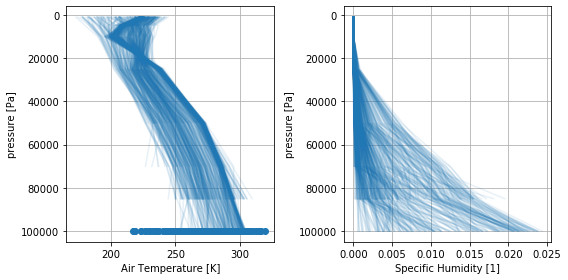

In [160]:
n_profiles = 100

time_idx = np.random.randint(0,ds_tas['time'].size,n_profiles)
lat_idx = np.random.randint(0,ds_tas['lat'].size,n_profiles)
lon_idx = np.random.randint(0,ds_tas['lon'].size,n_profiles)

plt.figure(figsize=(8,4))

ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

for prof_idx in range(n_profiles):

    tas = ds_tas['tas'].sel(
        time=ds_tas['time'][time_idx[prof_idx]],
        lat=ds_tas['lat'][lat_idx[prof_idx]],
        lon=ds_tas['lon'][lon_idx[prof_idx]]
    )

    ta = ds_ta['ta'].sel(
        time=ds_ta['time'][time_idx[prof_idx]],
        lat=ds_ta['lat'][lat_idx[prof_idx]],
        lon=ds_ta['lon'][lon_idx[prof_idx]]
    )

    hus = ds_hus['hus'].sel(
        time=ds_hus['time'][time_idx[prof_idx]],
        lat=ds_hus['lat'][lat_idx[prof_idx]],
        lon=ds_hus['lon'][lon_idx[prof_idx]]
    )
    
    ax = ax1
    ta.plot(color='C0',ax=ax,y='plev',alpha=0.1)
    ax.plot(tas,1.e5,"C0o")
    ax.set_title("")
    ax.grid(True)

    ax = ax2
    hus.plot(color='C0',ax=ax,y='plev',alpha=0.1)
    ax.set_title("")
    ax.grid(True)

ax1.invert_yaxis()
ax2.invert_yaxis()

plt.tight_layout()

# Sampling Algorithm
Create masks to subset model locations and times which fall within 5 Kelvin intervals of surface temperature, ranging from 260 K to 330 K, and randomly select 10 profiles from each such subset. Save these profile as `interim` files which will be later interpolated to a common grid and fed into climlab and PyRADS.